## Import Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline


In [2]:
X_top = pd.read_csv('../datasets/X_top.csv',index_col='Id') 
y = pd.read_csv('../datasets/y.csv',index_col='Id') 


In [3]:
housing_test =pd.read_csv('../datasets/test.csv',index_col='Id')

In [4]:
#Encoding NaN with appropriate values
housing_test.loc[:, "Alley"] = housing_test.loc[:, "Alley"].fillna("None")

housing_test.loc[:, "BedroomA bvGr"] = housing_test.loc[:, "Bedroom AbvGr"].fillna(0)

housing_test.loc[:, "Bsmt Qual"] = housing_test.loc[:, "Bsmt Qual"].fillna("No")
housing_test.loc[:, "Bsmt Cond"] = housing_test.loc[:, "Bsmt Cond"].fillna("No")
housing_test.loc[:, "Bsmt Exposure"] = housing_test.loc[:, "Bsmt Exposure"].fillna("No")
housing_test.loc[:, "BsmtFin Type 1"] = housing_test.loc[:, "BsmtFin Type 1"].fillna("No")
housing_test.loc[:, "BsmtFin Type 2"] = housing_test.loc[:, "BsmtFin Type 2"].fillna("No")
housing_test.loc[:, "Bsmt Full Bath"] = housing_test.loc[:, "Bsmt Full Bath"].fillna(0)
housing_test.loc[:, "Bsmt Half Bath"] = housing_test.loc[:, "Bsmt Half Bath"].fillna(0)
housing_test.loc[:, "Bsmt Unf SF"] = housing_test.loc[:, "Bsmt Unf SF"].fillna(0)

housing_test.loc[:, "Central Air"] = housing_test.loc[:, "Central Air"].fillna("N")

housing_test.loc[:, "Condition 1"] = housing_test.loc[:, "Condition 1"].fillna("Norm")
housing_test.loc[:, "Condition 2"] = housing_test.loc[:, "Condition 2"].fillna("Norm")

housing_test.loc[:, "Enclosed Porch"] = housing_test.loc[:, "Enclosed Porch"].fillna(0)

housing_test.loc[:, "Exter Cond"] = housing_test.loc[:, "Exter Cond"].fillna("TA")
housing_test.loc[:, "Exter Qual"] = housing_test.loc[:, "Exter Qual"].fillna("TA")

housing_test.loc[:, "Fence"] = housing_test.loc[:, "Fence"].fillna("No")

housing_test.loc[:, "Fireplace Qu"] = housing_test.loc[:, "Fireplace Qu"].fillna("No")
housing_test.loc[:, "Fireplaces"] = housing_test.loc[:, "Fireplaces"].fillna(0)

housing_test.loc[:, "Functional"] = housing_test.loc[:, "Functional"].fillna("Typ")

housing_test.loc[:, "Garage Type"] = housing_test.loc[:, "Garage Type"].fillna("No")
housing_test.loc[:, "Garage Finish"] = housing_test.loc[:, "Garage Finish"].fillna("No")
housing_test.loc[:, "Garage Qual"] = housing_test.loc[:, "Garage Qual"].fillna("No")
housing_test.loc[:, "Garage Cond"] = housing_test.loc[:, "Garage Cond"].fillna("No")
housing_test.loc[:, "Garage Area"] = housing_test.loc[:, "Garage Area"].fillna(0)
housing_test.loc[:, "Garage Cars"] = housing_test.loc[:, "Garage Cars"].fillna(0)

housing_test.loc[:, "Half Bath"] = housing_test.loc[:, "Half Bath"].fillna(0)

housing_test.loc[:, "Heating QC"] = housing_test.loc[:, "Heating QC"].fillna("TA")

housing_test.loc[:, "Kitchen AbvGr"] = housing_test.loc[:, "Kitchen AbvGr"].fillna(0)

housing_test.loc[:, "Kitchen Qual"] = housing_test.loc[:, "Kitchen Qual"].fillna("TA")

housing_test.loc[:, "Lot Frontage"] = housing_test.loc[:, "Lot Frontage"].fillna(0)

housing_test.loc[:, "Lot Shape"] = housing_test.loc[:, "Lot Shape"].fillna("Reg")

housing_test.loc[:, "Mas Vnr Type"] = housing_test.loc[:, "Mas Vnr Type"].fillna("None")
housing_test.loc[:, "Mas Vnr Area"] = housing_test.loc[:, "Mas Vnr Area"].fillna(0)

housing_test.loc[:, "Misc Feature"] = housing_test.loc[:, "Misc Feature"].fillna("No")
housing_test.loc[:, "Misc Val"] = housing_test.loc[:, "Misc Val"].fillna(0)

housing_test.loc[:, "Open Porch SF"] = housing_test.loc[:, "Open Porch SF"].fillna(0)

housing_test.loc[:, "Paved Drive"] = housing_test.loc[:, "Paved Drive"].fillna("N")

housing_test.loc[:, "Pool QC"] = housing_test.loc[:, "Pool QC"].fillna("No")
housing_test.loc[:, "Pool Area"] = housing_test.loc[:, "Pool Area"].fillna(0)

housing_test.loc[:, "Overall Cond"] = housing_test.loc[:, "Overall Cond"].fillna("Normal")

housing_test.loc[:, "Screen Porch"] = housing_test.loc[:, "Screen Porch"].fillna(0)

housing_test.loc[:, "TotRms AbvGrd"] = housing_test.loc[:, "TotRms AbvGrd"].fillna(0)

housing_test.loc[:, "Utilities"] = housing_test.loc[:, "Utilities"].fillna("AllPub")

housing_test.loc[:, "Total Bsmt SF"] = housing_test.loc[:, "Total Bsmt SF"].fillna(0)
housing_test.loc[:, "BsmtFin SF 2"] = housing_test.loc[:, "BsmtFin SF 2"].fillna(0)
housing_test.loc[:, "BsmtFin SF 1"] = housing_test.loc[:, "BsmtFin SF 1"].fillna(0)

In [5]:
# Encoding missing Garage Year Built years with the Year that the house was built
housing_test['Garage Yr Blt'] = housing_test.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

In [6]:
#Encoding with appropriate values
housing_test = housing_test.replace({"MS SubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "Mo Sold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [7]:
#Encoding with appropriate values
housing_test = housing_test.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "Bsmt Cond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Bsmt Exposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFin Type1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFin Type2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "Bsmt Qual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "Exter Cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Exter Qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Fireplace Qu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "Garage Cond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Garage Qual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Heating QC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Kitchen Qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Land Slope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "Lot Shape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "Paved Drive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "Pool QC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}},
                     )

In [8]:
#Creating new features to analyse age related features better

housing_test['house age'] = housing_test['Yr Sold'] - housing_test['Year Built'] 
housing_test['reno newness'] = housing_test['Yr Sold'] - housing_test['Year Remod/Add'] 

In [9]:
housing_test[['PID','Year Remod/Add','Year Built','Garage Yr Blt','Yr Sold']] = housing_test[['PID','Year Remod/Add','Year Built','Garage Yr Blt','Yr Sold']].astype(str)

In [10]:
# Droping PID and Year of remodling as they do not add information to analysis
housing_test.drop(['PID','Year Remod/Add'] , axis =1, inplace = True)

In [11]:
#Enconding categorical features with get_dummies

housing_test =pd.get_dummies(housing_test, columns =['MS SubClass', 'MS Zoning', 'Alley', 'Land Contour', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Year Built', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Fence', 'Misc Feature', 'Mo Sold',
       'Yr Sold', 'Sale Type'], drop_first = True)

In [12]:
X_top_train, X_top_test, y_top_train, y_top_test = train_test_split(X_top,y,test_size = 0.2, random_state=42)

In [13]:
ss = StandardScaler()
ss.fit(X_top_train)

X_top_train_ss = ss.transform(X_top_train)
X_top_test_ss = ss.transform(X_top_test)

## ElasticNet Model

In [14]:
# Instantiate pipeline object.
pipe_e = Pipeline([('ss', StandardScaler()), ('enet', ElasticNet())])


In [15]:
# Define dictionary of hyperparameters.

pipe_e_params = {'ss__with_mean': [True, False], 
                'ss__with_std': [True, False],
                'enet__alpha': np.arange(0.01, 1.0, 0.05),
                'enet__l1_ratio': np.linspace(0.01, 1.0, 25),
                 'enet__normalize': [True, False],
                }

In [16]:
# Instantiate our GridSearchCV object.

gs_e = GridSearchCV(pipe_e, # What is the model we want to fit?
                               pipe_e_params, # What is the dictionary of hyperparameters?
                                 cv = 10,# What number of folds in CV will we use?
                                verbose=1)

In [17]:
gs_e.fit(X_top_train_ss, y_top_train);

Fitting 10 folds for each of 4000 candidates, totalling 40000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40000 out of 40000 | elapsed:  6.5min finished


In [18]:
X_sub= housing_test

In [19]:
missing_features = list(set(X_sub.columns.values)-set(X_top.columns.values))
X_sub= X_sub.drop(missing_features, axis =1)

In [20]:
X_sub.columns

Index(['Lot Area', 'Lot Shape', 'Overall Qual', 'Mas Vnr Area', 'Exter Qual',
       'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Heating QC', '1st Flr SF', 'Gr Liv Area', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'house age', 'reno newness',
       'MS SubClass_SC60', 'MS Zoning_RM', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Year Built_2008',
       'Roof Style_Gable', 'Roof Style_Hip'],
      dtype='object')

In [21]:
X_top.columns

Index(['Lot Area', 'Lot Shape', 'Overall Qual', 'Mas Vnr Area', 'Exter Qual',
       'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Heating QC', '1st Flr SF', 'Gr Liv Area', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'house age', 'reno newness',
       'MS SubClass_SC60', 'MS Zoning_RM', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Year Built_2008',
       'Roof Style_Gable', 'Roof Style_Hip'],
      dtype='object')

In [22]:
Submission = ss.transform(X_sub)

In [23]:
X_sub.shape

(879, 25)

In [24]:
pred_test = gs_e.predict(Submission)

In [25]:
pred_test.mean()

180588.89763402464

In [26]:
submission=pd.DataFrame(pred_test,columns=["SalePrice"], index = housing_test.index)

In [27]:
submission.to_csv("../datasets/submission_ElasticNet.csv")

predicted price RMSE is 31175.57874

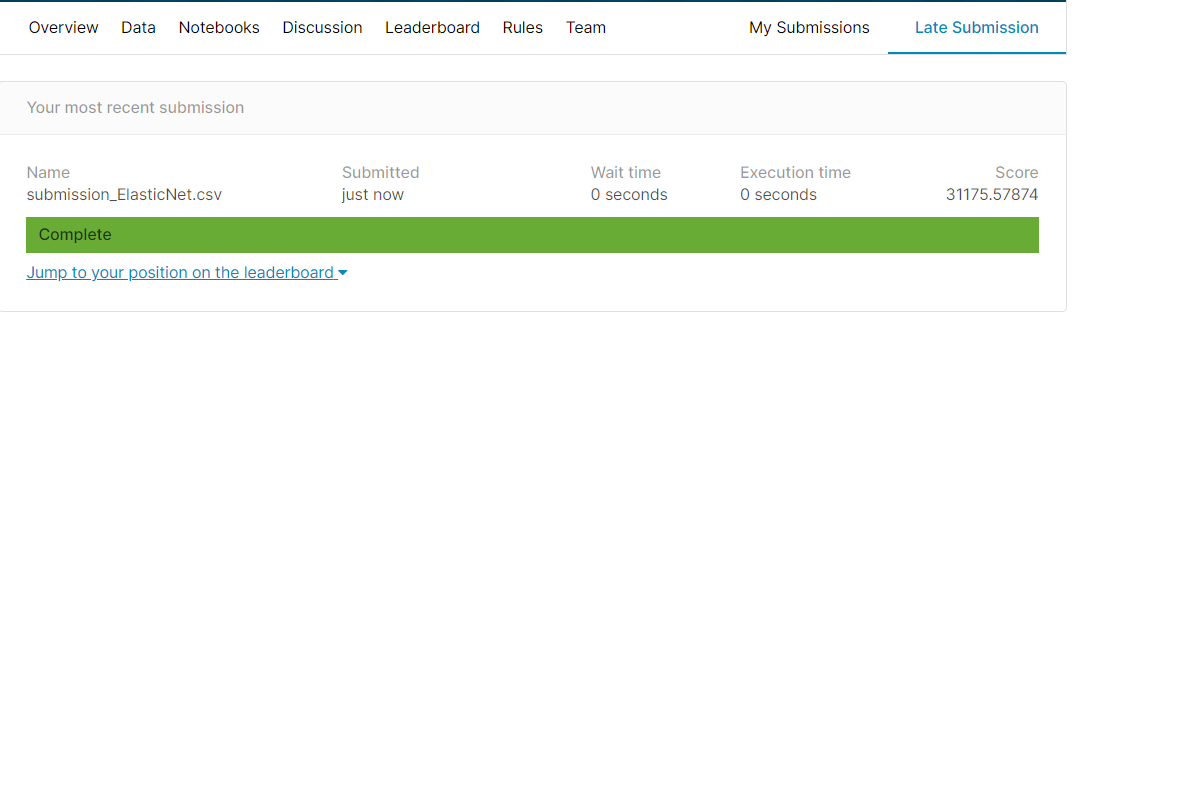

In [31]:
from IPython.display import Image
Image('../image/Kaggle submission.png')
